In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from PIL import Image

  0%|                                                                                          | 0/218 [00:00<?, ?it/s]

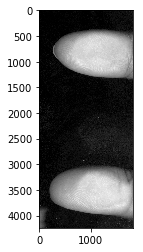

In [2]:
#segregated images into 3 folders named schiz, cont and OCD (try it with thumb image and full hand prints seperately)
datadir = "C:/Users/Rimjhim/Desktop/dermatoglyphics/dermato1/data"
categories = ['schiz','cont','OCD']

#Display image
for category in categories:
    path = os.path.join(datadir, category)
    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break    
        

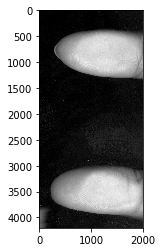

In [3]:
#declaaring size of images, this is working okay for thumb images but bad with full hand prints, 
#we need to change the size to bigger when its full hand, CNN requires image size to be delared
img_size = 2000
img_size_y= 4200
new_array = cv2.resize(img_array, (img_size,img_size_y), Image.ANTIALIAS)
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
#Imorting images and saving it in training set array
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()
            

100%|████████████████████████████████████████████████████████████████████████████████| 129/129 [00:46<00:00,  2.50it/s]


In [5]:
print (len(training_data))

347


In [6]:
import random 
random.shuffle(training_data)

In [7]:
#for sample in training_data[:10]:
 #   print(sample[1])

In [7]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

x =np.array(x).reshape(-1, img_size, img_size, 1)

In [ ]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [27]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

#or
# x= pickle.load(open("x.pickle","rb"))
#y= --same--

In [ ]:
#convolution neural network
#https://www.youtube.com/watch?v=WvoLTXIjBYU

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time

#name = "Dermato_cnn_64x2-{}".format(int(time.time()))

x=x/225

In [22]:
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers =[1,3,5,10]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            Name= "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size,dense_layer,
                                                       int(time.time()))
            print(Name)
            tensorboard = TensorBoard(log_dir='logs/{}'.format(name)) 
            model = Sequential()
            
            model.add(Conv2D(layer_size, (3,3), input_shape = x.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range (conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            model.compile(loss = "binary_crossentropy",
                         optimizer="adam",
                         metrics=['accuracy'])

            model.fit(x,y, batch_size=2, epochs= 10, validation_split=0.3, callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1538213461
Train on 9 samples, validate on 4 samples
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.500 - 0s 36ms/step - loss: 0.6930 - acc: 0.4444 - val_loss: 0.7001 - val_acc: 0.2500
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.500 - 0s 4ms/step - loss: 0.6820 - acc: 0.6667 - val_loss: 0.7300 - val_acc: 0.2500
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.6262 - acc: 1.000 - 0s 7ms/step - loss: 0.6753 - acc: 0.6667 - val_loss: 0.7882 - val_acc: 0.2500
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 0.5429 - acc: 1.000 - 0s 7ms/step - loss: 0.6579 - acc: 0.6667 - val_loss: 0.8617 - val_acc: 0.2500
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 0.4619 - acc: 1.000 - 0s 7ms/step - loss: 0.6523 - acc: 0.6667 - val_loss: 0.9334 - val_acc: 0.2500
Epoch 6/10
9/9 [==============================] - ETA: 0s - loss: 0.7544 - acc: 0.500 - 0s 5

Epoch 10/10
9/9 [==============================] - ETA: 0s - loss: 0.7549 - acc: 0.500 - ETA: 0s - loss: 0.7520 - acc: 0.500 - ETA: 0s - loss: 0.6432 - acc: 0.666 - ETA: 0s - loss: 0.6680 - acc: 0.625 - 0s 32ms/step - loss: 0.6420 - acc: 0.6667 - val_loss: 0.8986 - val_acc: 0.2500
3-conv-128-nodes-0-dense-1538213556
Train on 9 samples, validate on 4 samples
Epoch 1/10
9/9 [==============================] - ETA: 1s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6932 - acc: 0.250 - ETA: 0s - loss: 0.6906 - acc: 0.500 - ETA: 0s - loss: 0.6913 - acc: 0.500 - 1s 81ms/step - loss: 0.6952 - acc: 0.4444 - val_loss: 0.7069 - val_acc: 0.2500
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.500 - ETA: 0s - loss: 0.6935 - acc: 0.500 - ETA: 0s - loss: 0.6870 - acc: 0.666 - ETA: 0s - loss: 0.6833 - acc: 0.750 - 0s 38ms/step - loss: 0.6873 - acc: 0.6667 - val_loss: 0.7064 - val_acc: 0.2500
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.6935 - acc

Epoch 10/10
9/9 [==============================] - ETA: 0s - loss: 0.3249 - acc: 1.000 - ETA: 0s - loss: 0.6411 - acc: 0.666 - 0s 17ms/step - loss: 0.6397 - acc: 0.6667 - val_loss: 0.9686 - val_acc: 0.2500
1-conv-128-nodes-1-dense-1538213697
Train on 9 samples, validate on 4 samples
Epoch 1/10
9/9 [==============================] - ETA: 2s - loss: 0.6931 - acc: 0.500 - ETA: 1s - loss: 0.6929 - acc: 0.500 - ETA: 0s - loss: 0.7022 - acc: 0.333 - ETA: 0s - loss: 0.7000 - acc: 0.375 - 2s 214ms/step - loss: 0.6941 - acc: 0.4444 - val_loss: 0.7578 - val_acc: 0.2500
Epoch 2/10
9/9 [==============================] - ETA: 1s - loss: 0.5813 - acc: 1.000 - ETA: 0s - loss: 0.6509 - acc: 0.750 - ETA: 0s - loss: 0.7930 - acc: 0.500 - ETA: 0s - loss: 0.7102 - acc: 0.625 - 1s 164ms/step - loss: 0.6824 - acc: 0.6667 - val_loss: 0.9014 - val_acc: 0.2500
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.4249 - acc: 1.000 - ETA: 0s - loss: 0.8084 - acc: 0.500 - ETA: 0s - loss: 0.7945 - a

9/9 [==============================] - ETA: 0s - loss: 0.6937 - acc: 0.500 - ETA: 0s - loss: 0.6778 - acc: 0.750 - ETA: 0s - loss: 0.6968 - acc: 0.500 - ETA: 0s - loss: 0.6855 - acc: 0.625 - 0s 46ms/step - loss: 0.6810 - acc: 0.6667 - val_loss: 0.7248 - val_acc: 0.2500
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 0.6346 - acc: 1.000 - ETA: 0s - loss: 0.7055 - acc: 0.500 - ETA: 0s - loss: 0.7027 - acc: 0.500 - ETA: 0s - loss: 0.6790 - acc: 0.625 - 0s 45ms/step - loss: 0.6694 - acc: 0.6667 - val_loss: 0.7652 - val_acc: 0.2500
Epoch 6/10
9/9 [==============================] - ETA: 0s - loss: 0.7036 - acc: 0.500 - ETA: 0s - loss: 0.6287 - acc: 0.750 - ETA: 0s - loss: 0.5938 - acc: 0.833 - ETA: 0s - loss: 0.6254 - acc: 0.750 - 0s 46ms/step - loss: 0.6695 - acc: 0.6667 - val_loss: 0.8738 - val_acc: 0.2500
Epoch 7/10
9/9 [==============================] - ETA: 0s - loss: 1.0209 - acc: 0.0000e+0 - ETA: 0s - loss: 0.7470 - acc: 0.5000    - ETA: 0s - loss: 0.6577 - acc: 0.66